#### MetaData - Prepared manually by taking the Fitness -https://royalsocietypublishing.org/doi/10.1098/rspb.2015.2292 & the allele count data and sequencing data - https://github.com/benjaminhgood/LTEE-metagenomic.

##### import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact
import utility, importlib
from scipy.stats import spearmanr
pd.set_option('mode.chained_assignment', None)

#### Read Fitness data from metadata

In [2]:
df_Fitness2_experimental = pd.read_excel("../data/MetaData_ecoli_final.xlsx", sheet_name="Fitness2_experimental")
df_Fitness2_experimental = df_Fitness2_experimental.rename(columns={'label ': 'label'})
df_Fitness2_experimental.head()

,Generation,Red.Pop,Fitness,Mutator.Ever,label
0,0,Ara - 1,0.910700,Yes,m1
1,500,Ara - 1,1.112534,Yes,m1
2,1000,Ara - 1,0.998220,Yes,m1
3,1500,Ara - 1,1.203381,Yes,m1
4,2000,Ara - 1,1.262659,Yes,m1


##### Check for duplicate 

In [3]:
df_Fitness2_experimental[df_Fitness2_experimental.duplicated()] # No duplicate row found

,Generation,Red.Pop,Fitness,Mutator.Ever,label


##### Read gain sheet data

In [4]:
df_Gain_calculated = pd.read_excel("../data/MetaData_ecoli_final.xlsx", sheet_name= "Gain score")
df_Gain_calculated.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914
1,201,thrL,T->G,T,G,missense,p6,-1.750693
2,241,thrL,A->C,A,C,missense,m1,-0.911836
3,309,thrA,T->G,T,G,noncoding,m1,4.009052
4,322,thrA,A->G,A,G,noncoding,p3,1.532477


In [5]:
df_Gain_calculated[df_Gain_calculated.duplicated(subset=['Position', 'Gene',
 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain


##### Read Allele count and generation data from metasheet

In [6]:
df_Alt_allele_count_all_generation = pd.read_excel("../data/MetaData_ecoli_final.xlsx", sheet_name= "Mastersheet")
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Check if any duplicated row

In [7]:
df_Alt_allele_count_all_generation[df_Alt_allele_count_all_generation.duplicated(subset=['Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'])]

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
2028,chrI,450000,ylaB,A->G,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,A,G,p3


##### delete duplicate row in df_Alt_allele_count_all_generation dataframe where duplicate indicate when ['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'] are same in mutiple row


In [8]:
df_Alt_allele_count_all_generation.drop_duplicates(subset=['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label'], inplace=True)
df_Alt_allele_count_all_generation.reset_index(inplace=True, drop=True)
# df_Alt_allele_count_all_generation

In [9]:
df_Alt_allele_count_all_generation.head()

,CHROM,Position,Gene,Allele,Annotation,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,...,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000,Ref_allele,Alt_allele,label
0,chrI,1554,thrA,C->A,missense,0,1,0,2,1.0,...,0,0,1.0,0.0,1.0,0.0,0.0,C,A,p1
1,chrI,1556,thrA,C->A,synonymous,0,0,0,2,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,A,p1
2,chrI,2450,thrA,G->T,synonymous,0,0,0,0,0.0,...,81,41,109.0,129.0,4.0,67.0,8.0,G,T,p1
3,chrI,4274,thrC,C->T,missense,0,0,0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,C,T,p1
4,chrI,6400,yaaA,T->G,missense,0,0,0,0,2.0,...,0,0,0.0,0.0,0.0,0.0,0.0,T,G,p1


##### Read LLR Score

In [10]:
df_esm = pd.read_excel("../data/LLR.xlsx")
df_esm.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,Start,End,Strand,...,has_space,WT_aa_made2,comparison2,Mut_aa_made,SNP,seq_id_x,universal_id,seq_id_y,mut_name,esm_score
0,241,thrL,A->C,A,C,missense,m1,190,255,+,...,False,MKRISTTITTTITITTGNGAG,True,MKRISTTITTTITITTGHGAG,N18H,241_thrL,241_thrL_N18H,241_thrL,N18H,-4.279933
1,1615,thrA,T->G,T,G,missense,m1,336,2798,+,...,False,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,True,MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNH...,I427S,1615_thrA,1615_thrA_I427S,1615_thrA,I427S,-11.530375
2,8430,talB,T->G,T,G,missense,m1,8236,9189,+,...,False,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,True,MTDKLTSLRQYTTVVADTGDIAAMKLYQPQDATTNPSLILNAAQIP...,D65E,8430_talB,8430_talB_D65E,8430_talB,D65E,-5.331029
3,12527,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,M123L,12527_dnaK,12527_dnaK_M123L,12527_dnaK,M123L,-4.669276
4,13974,dnaK,A->C,A,C,missense,m1,12161,14077,+,...,False,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,True,MGKIIGIDLGTTNSCVAIMDGTTPRVLENAEGDRTTPSIIAYTQDG...,Q605P,13974_dnaK,13974_dnaK_Q605P,13974_dnaK,Q605P,-7.992450


##### Drop Duplicates if any in df_esm

In [11]:
df_esm_no_duplicates = df_esm[["Position",  "Gene", "label", "esm_score", "Allele"]].drop_duplicates(subset= ["Position",  "Gene", "label", "Allele"], keep='first')
df_esm_no_duplicates.dropna(inplace=True)
df_esm_no_duplicates.reset_index(inplace=True, drop=True)
df_esm_no_duplicates.head()

,Position,Gene,label,esm_score,Allele
0,241,thrL,m1,-4.279933,A->C
1,1615,thrA,m1,-11.530375,T->G
2,8430,talB,m1,-5.331029,T->G
3,12527,dnaK,m1,-4.669276,A->C
4,13974,dnaK,m1,-7.992450,A->C


##### Merge Gain score and LLR score 

In [12]:
df_complete = pd.merge(df_Gain_calculated,df_Alt_allele_count_all_generation, on=['Position','Gene','Allele','Annotation','Ref_allele','Alt_allele','label'], how = "left")
df_complete.head()

,Position,Gene,Allele,Ref_allele,Alt_allele,Annotation,label,accumulated_gain,CHROM,AC:0,...,AC:55500,AC:56000,AC:56500,AC:57000,AC:57500,AC:58000,AC:58500,AC:59000,AC:59500,AC:60000
0,63,intergenic,A->C,A,C,noncoding,p6,-10.385914,chrI,0,...,49,78,45,22,36,39.0,11.0,1.0,1.0,6.0
1,201,thrL,T->G,T,G,missense,p6,-1.750693,chrI,0,...,100,140,93,28,79,62.0,15.0,3.0,0.0,13.0
2,241,thrL,A->C,A,C,missense,m1,-0.911836,chrI,0,...,6,1,2,0,0,0.0,0.0,0.0,0.0,0.0
3,309,thrA,T->G,T,G,noncoding,m1,4.009052,chrI,0,...,0,0,0,0,0,0.0,1.0,2.0,7.0,9.0
4,322,thrA,A->G,A,G,noncoding,p3,1.532477,chrI,0,...,23,24,13,16,26,8.0,30.0,22.0,23.0,0.0


##### Extract the column relavent for current analysis from allele count dataframe (all the generation wise allele count, 'CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label')


In [13]:
filtered_list = [item for item in df_complete if item.startswith("AC")] ## Fiter the column starting with "AC" which indicate allele count
filtered_list.extend(['CHROM','Position', 'Gene', 'Allele', 'Annotation', 'Ref_allele', 'Alt_allele','label', "accumulated_gain"]) ##Add other relavent information
df_allele_generation = df_complete[filtered_list]
df_allele_generation.head() # Get complete dataframe containing all generation wise allele count and other relavent column

,AC:0,AC:1000,AC:1500,AC:2000,AC:2500,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,...,AC:60000,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0.0,0,0,0,0,0,...,6.0,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0.0,0,0,0,0,0,...,13.0,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0.0,0,0,0,0,0,...,9.0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0.0,0,0,0,0,0,...,0.0,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Define mutator and non-mutator population 

In [14]:
mutator_list = ['m1', 'm2', 'm3', 'm4', 'p3', 'p6']
non_mutator_list = ['p1', 'p2', 'p4', 'p5', 'm5', 'm6']

##### Population wise mutation count (fig - 2c)

In [15]:
print("The number of mutation present population wise :")
df_complete["label"].value_counts()

The number of mutation present population wise :


label
p6    11257
p3     5967
m1     4994
m4     4953
m2     3398
m3     3215
p1      957
m5      600
m6      475
p4      420
p5      355
p2      331
Name: count, dtype: int64

##### Find the generation which have missing value 

In [16]:
nan_columns = df_allele_generation.columns[df_allele_generation.isna().any()]
df_with_nan = df_allele_generation[nan_columns]
nan_counts = df_allele_generation.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print("\n Number of NaN values in each column:")
print(nan_counts)


 Number of NaN values in each column:
AC:2500      355
AC:15000    4953
AC:46500     331
AC:58000    3753
AC:58500     355
AC:59000     355
AC:59500     355
AC:60000     355
dtype: int64


##### Drop the generation having nan values

In [17]:
df_allele_generation.drop(nan_counts.index.tolist(), axis = 1, inplace=True)
df_allele_generation.reset_index(inplace=True, drop = True)
df_allele_generation.head()

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,AC:57500,CHROM,Position,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain
0,0,0,0,0,0,0,0,0,0,0,...,36,chrI,63,intergenic,A->C,noncoding,A,C,p6,-10.385914
1,0,0,0,0,0,0,0,0,0,0,...,79,chrI,201,thrL,T->G,missense,T,G,p6,-1.750693
2,0,0,0,0,0,0,0,0,0,0,...,0,chrI,241,thrL,A->C,missense,A,C,m1,-0.911836
3,0,0,0,0,0,0,0,0,0,0,...,0,chrI,309,thrA,T->G,noncoding,T,G,m1,4.009052
4,0,0,0,0,0,0,0,0,0,0,...,26,chrI,322,thrA,A->G,noncoding,A,G,p3,1.532477


##### Plot accumulated gain vs type of mutator against essential and non essential gene

In [18]:
df_essential_gene = pd.read_excel("../data/gene type.xlsx")
df_essential_gene.head()

,Gene,type
0,thrL,non-essential
1,thrA,non-essential
2,thrB,non-essential
3,thrC,non-essential
4,yaaX,non-essential


##### drop row where gene name is not available

In [19]:
df_essential_gene.dropna(subset=["Gene"], inplace=True)
df_essential_gene.reset_index(inplace=True, drop=True)
df_essential_gene["Gene"] = df_essential_gene["Gene"].str.strip() # Trim white spaces from "Gene" column
df_essential_gene.head()

,Gene,type
0,thrL,non-essential
1,thrA,non-essential
2,thrB,non-essential
3,thrC,non-essential
4,yaaX,non-essential


In [20]:
df_Gain_calculated["Gene"] = df_Gain_calculated["Gene"].str.strip()
df_essential_gene["Gene"] = df_essential_gene["Gene"].str.strip()
df_allele_generation["Gene"] = df_allele_generation["Gene"].str.strip()

##### Get allele count across the generation

In [21]:
# Get the columns that start with 'AC'
ac_columns = [col for col in df_allele_generation.columns if col.startswith('AC')]

# Sum the columns column-wise
df_allele_generation["sum of alt AC"] =  df_allele_generation[ac_columns].sum(axis=1)

df_allele_generation["number_of_mutations"] = (df_allele_generation[ac_columns] != 0).sum(axis=1)
df_allele_generation["mutation type"] = np.where(df_allele_generation[ 'number_of_mutations'] > df_allele_generation["number_of_mutations"].median(), "Carry forward", "non carry forward")  ##### Where number_of_mutations> median number of mutations, assign it Carry forward otherwise assign non carry forward
df_allele_generation.sort_values(by="mutation type", inplace=True)

##### Remove intergenic region

In [22]:
df_allele_generation_exclude_intergenic = df_allele_generation[df_allele_generation.loc[:, "Gene"]!="intergenic"]
df_allele_generation_exclude_intergenic.drop_duplicates(subset = ['Gene', 'Position', 'label'], inplace=True)
df_allele_generation_exclude_intergenic.reset_index(drop=True, inplace=True)
df_allele_generation_exclude_intergenic

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain,sum of alt AC,number_of_mutations,mutation type
0,1,1,4,3,6,3,3,3,2,7,...,yhiE,G->A,missense,G,A,p6,-4.545999,125,41,Carry forward
1,0,0,0,1,0,0,0,1,0,0,...,yeaX,T->G,missense,T,G,p6,-6.006488,6631,93,Carry forward
2,0,0,0,0,0,0,0,0,0,0,...,yeaW,A->C,missense,A,C,p6,-0.676582,1183,40,Carry forward
3,0,0,0,0,0,0,0,0,0,0,...,yeaW,T->G,missense,T,G,p6,-7.395291,1159,42,Carry forward
4,0,0,0,0,0,0,0,0,0,0,...,yeaV,A->C,missense,A,C,p6,-0.233332,74,20,Carry forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34296,0,0,0,0,0,0,0,0,0,0,...,yeeZ,T->C,noncoding,T,C,m2,4.168308,50,9,non carry forward
34297,0,0,0,0,0,0,0,0,0,0,...,yeeZ,T->C,noncoding,T,C,m3,-8.233025,32,7,non carry forward
34298,0,0,0,0,0,0,0,0,0,0,...,yeeZ,A->C,synonymous,A,C,m1,-5.523833,56,7,non carry forward
34299,0,0,0,0,0,0,0,0,0,0,...,hisD,T->G,synonymous,T,G,m1,3.714361,13,5,non carry forward


##### Add mutator status

In [23]:
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple")


label_mapping = {
    'm1': 'mutator', 'm2': 'mutator', 'm3': 'mutator', 'm4': 'mutator',
    'p3': 'mutator', 'p6': 'mutator',
    'm5': 'nonmutator', 'm6': 'nonmutator', 'p1': 'nonmutator',
    'p2': 'nonmutator', 'p4': 'nonmutator', 'p5': 'nonmutator'
}

mutation_colors = {
    'Carry forward': 'red',
    'non carry forward': 'blue'
}

df_allele_generation_exclude_intergenic['Mutator_Status'] = df_allele_generation_exclude_intergenic['label'].map(label_mapping)


In [24]:
df_allele_generation

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain,sum of alt AC,number_of_mutations,mutation type
0,0,0,0,0,0,0,0,0,0,0,...,intergenic,A->C,noncoding,A,C,p6,-10.385914,1151,32,Carry forward
29114,1,1,4,3,6,3,3,3,2,7,...,yhiE,G->A,missense,G,A,p6,-4.545999,125,41,Carry forward
14761,0,0,0,1,0,0,0,1,0,0,...,yeaX,T->G,missense,T,G,p6,-6.006488,6631,93,Carry forward
14759,0,0,0,0,0,0,0,0,0,0,...,yeaW,A->C,missense,A,C,p6,-0.676582,1183,40,Carry forward
14758,0,0,0,0,0,0,0,0,0,0,...,yeaW,T->G,missense,T,G,p6,-7.395291,1159,42,Carry forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,0,0,0,0,0,0,0,0,0,0,...,yeeZ,T->C,noncoding,T,C,m2,4.168308,50,9,non carry forward
16082,0,0,0,0,0,0,0,0,0,0,...,yeeZ,T->C,noncoding,T,C,m3,-8.233025,32,7,non carry forward
16081,0,0,0,0,0,0,0,0,0,0,...,yeeZ,A->C,synonymous,A,C,m1,-5.523833,56,7,non carry forward
16096,0,0,0,0,0,0,0,0,0,0,...,hisD,T->G,synonymous,T,G,m1,3.714361,13,5,non carry forward


In [25]:
# df_allele_generation.sort_values(by="mutation type", inplace=True)

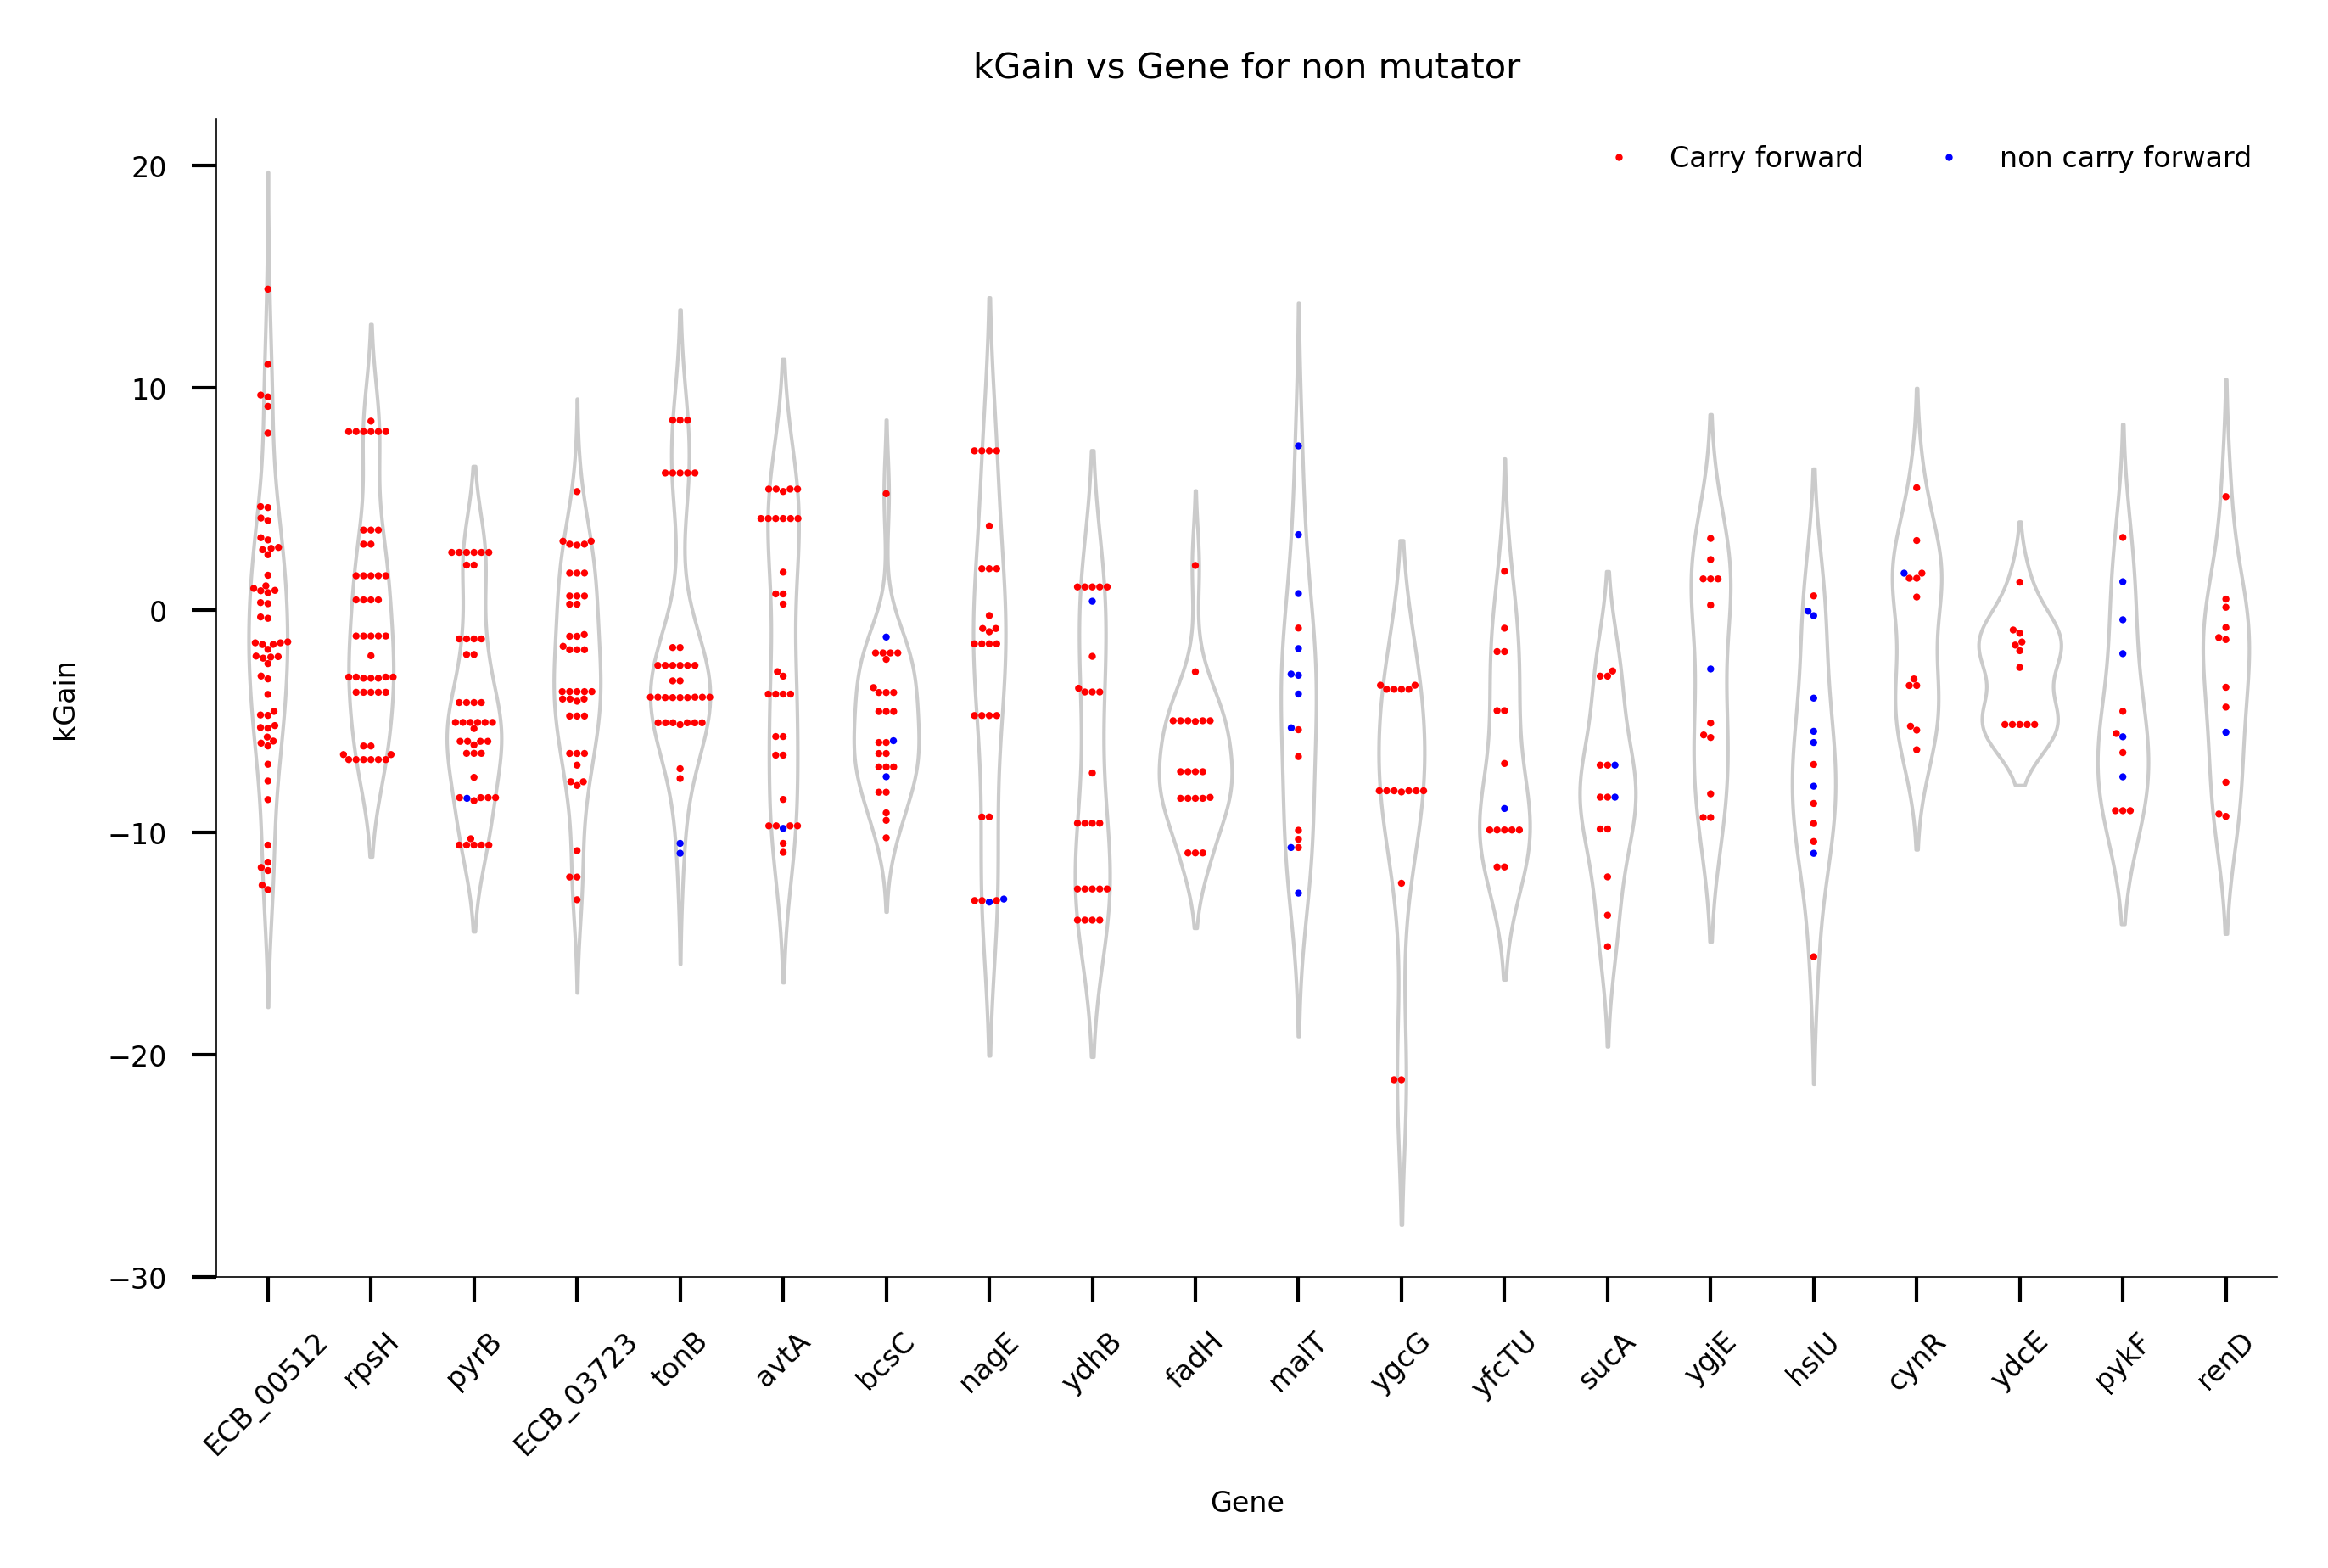

##### kGain vs Gene for mutator (fig -4a)

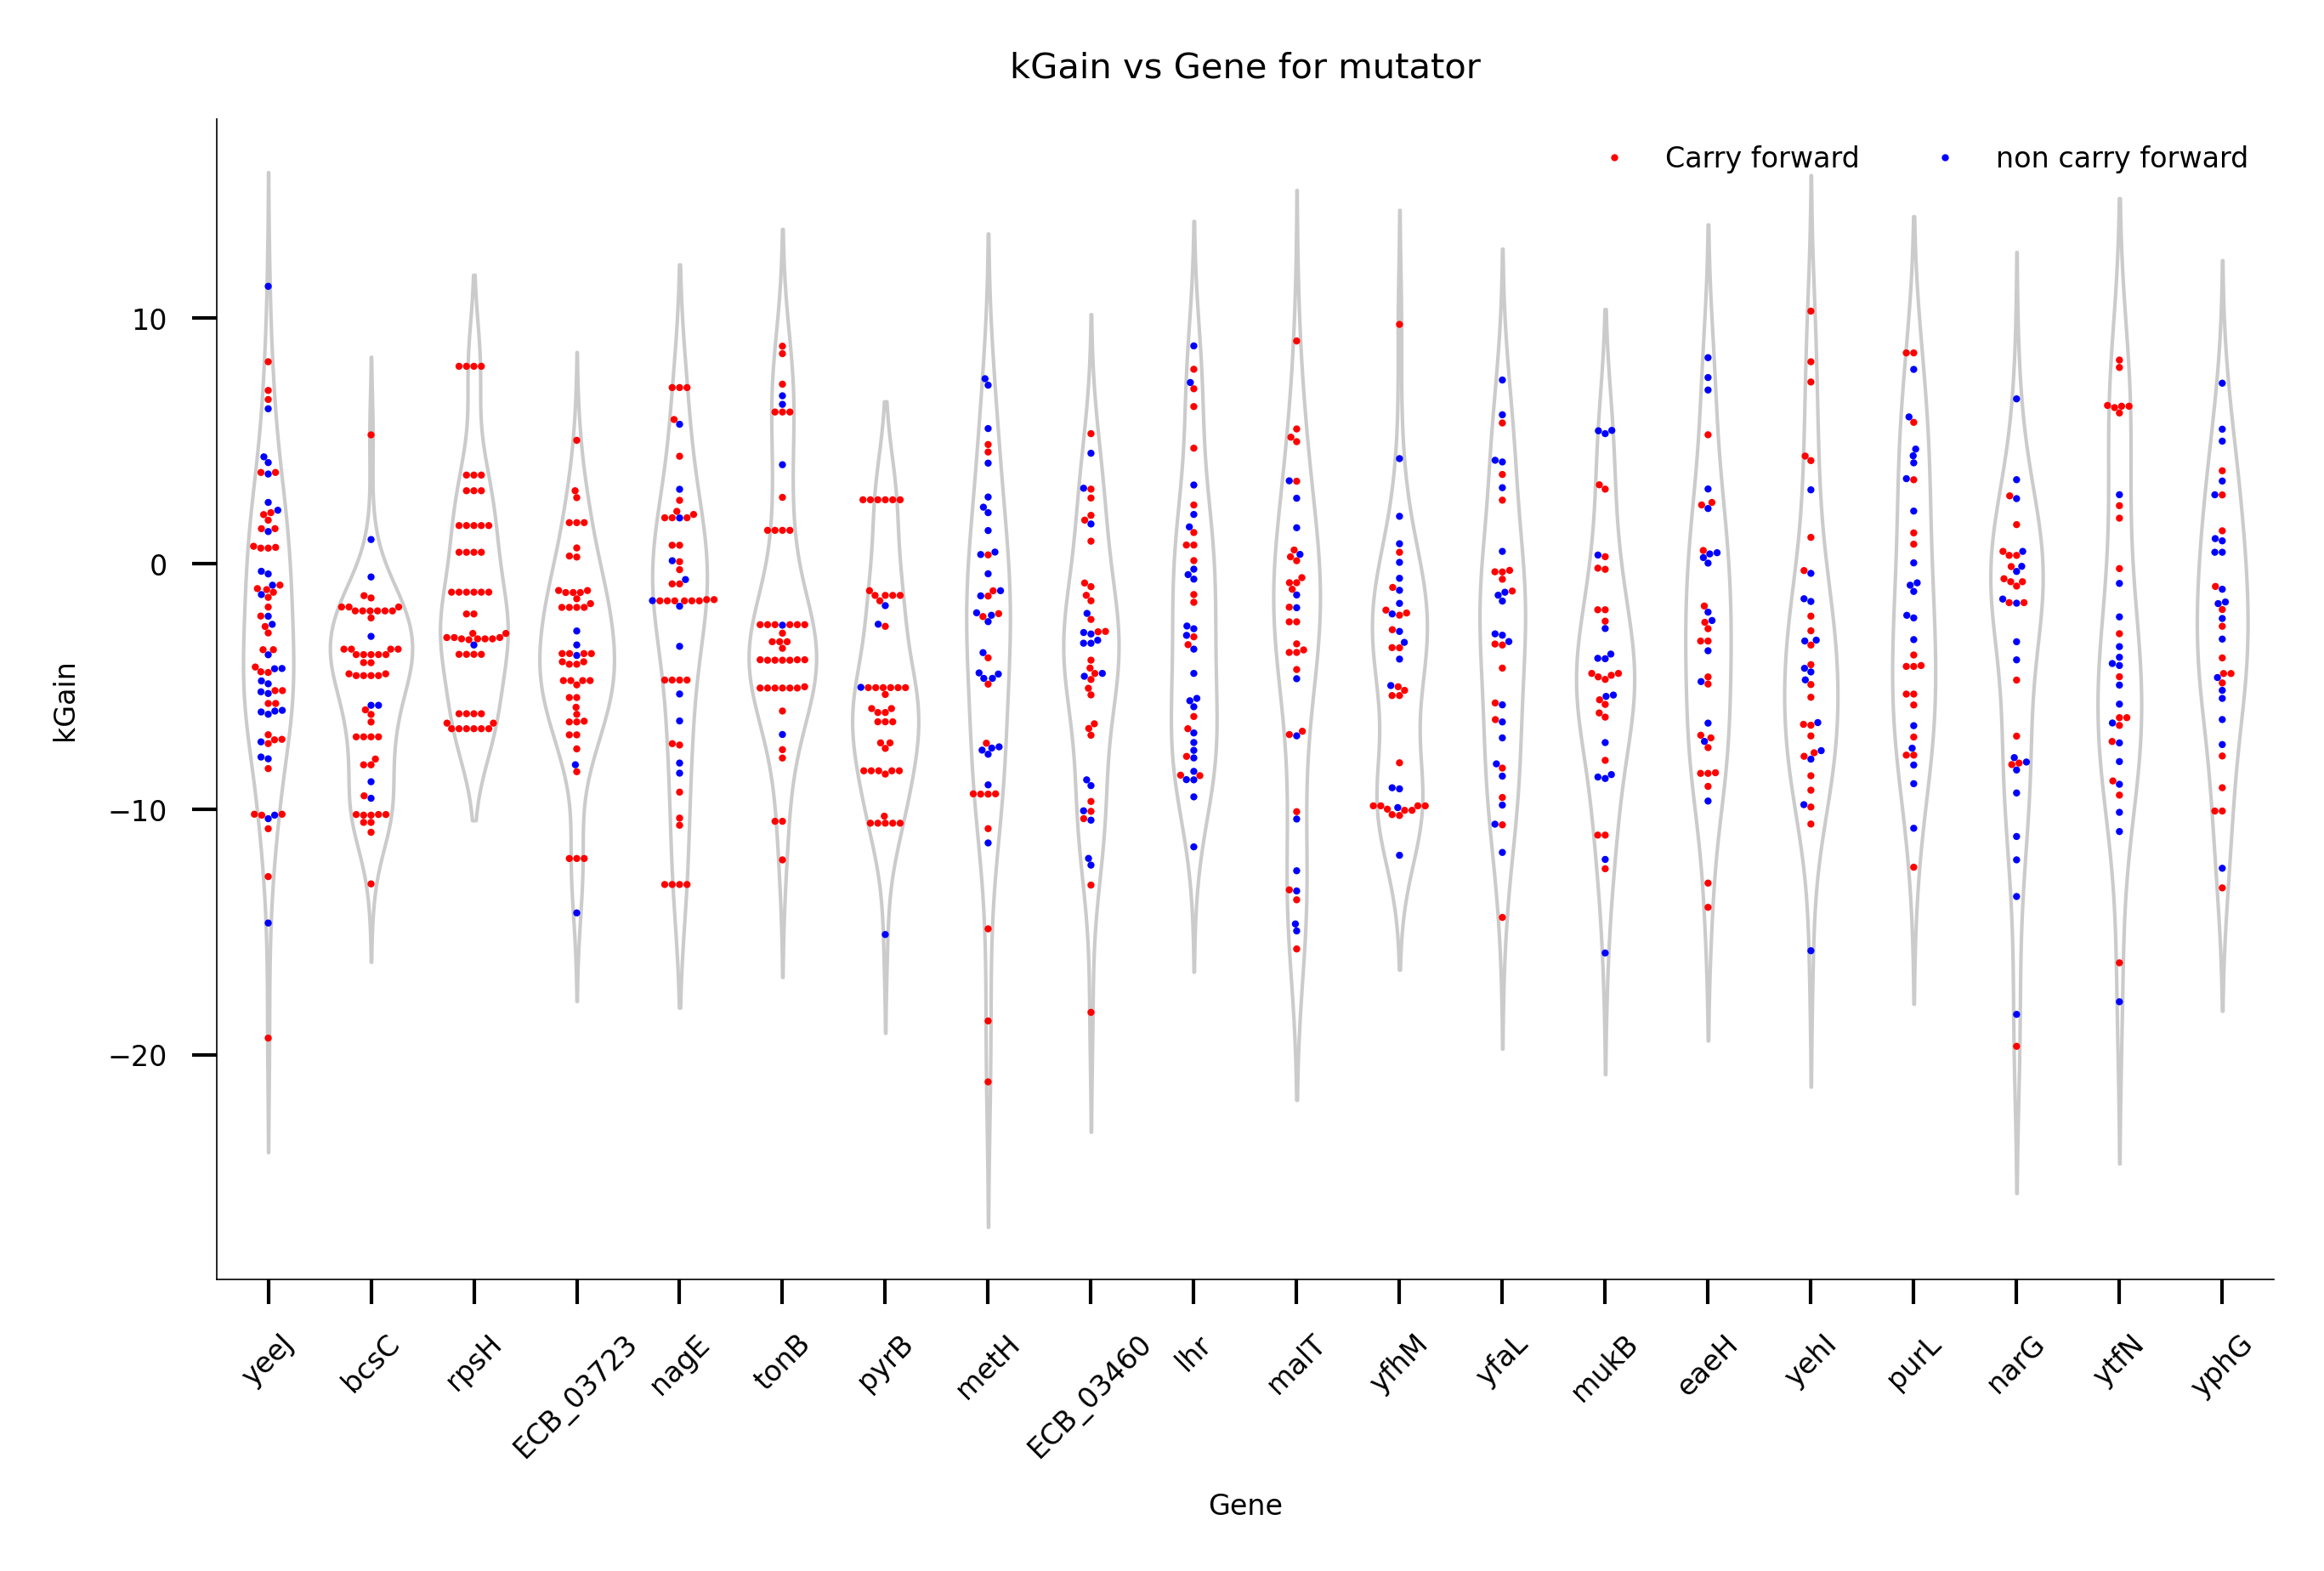

In [27]:
mutator_df=df_allele_generation_exclude_intergenic[df_allele_generation_exclude_intergenic.loc[:,"Mutator_Status"]=="mutator"]

frequent_genes_df_m = mutator_df['Gene'].value_counts()
frequent_genes_df_m = pd.DataFrame({'Gene': frequent_genes_df_m.index, 'Freq_m': frequent_genes_df_m.values})
topm = frequent_genes_df_m.sort_values(by='Freq_m', ascending=False).head(20)

merged_df_m = pd.merge(topm, mutator_df, on='Gene', how='left')

fig, ax = plt.subplots(1, 1, figsize = (5, 3), dpi = 600)
ax = sns.swarmplot(x='Gene', y='accumulated_gain', data=merged_df_m, hue='mutation type', size=1, ax=ax, palette=mutation_colors)
ax = sns.violinplot(x='Gene', y='accumulated_gain', data=merged_df_m, inner=None, color="1", alpha=0.5, width=0.8, ax=ax, linewidth=0.5)
ax.legend(ncol = 2, fontsize=4, frameon=False)
ax.set_ylabel("kGain")
plt.tight_layout()
ax.set_title("kGain vs Gene for mutator", fontsize=5)
ax = utility.custom_figure_axis(ax, fontsize = 4, rotation = 45)
# plt.savefig("kGain vs Gene for mutator.pdf", dpi = 600)

##### kGain vs Gene for non mutator (fig - 4b)

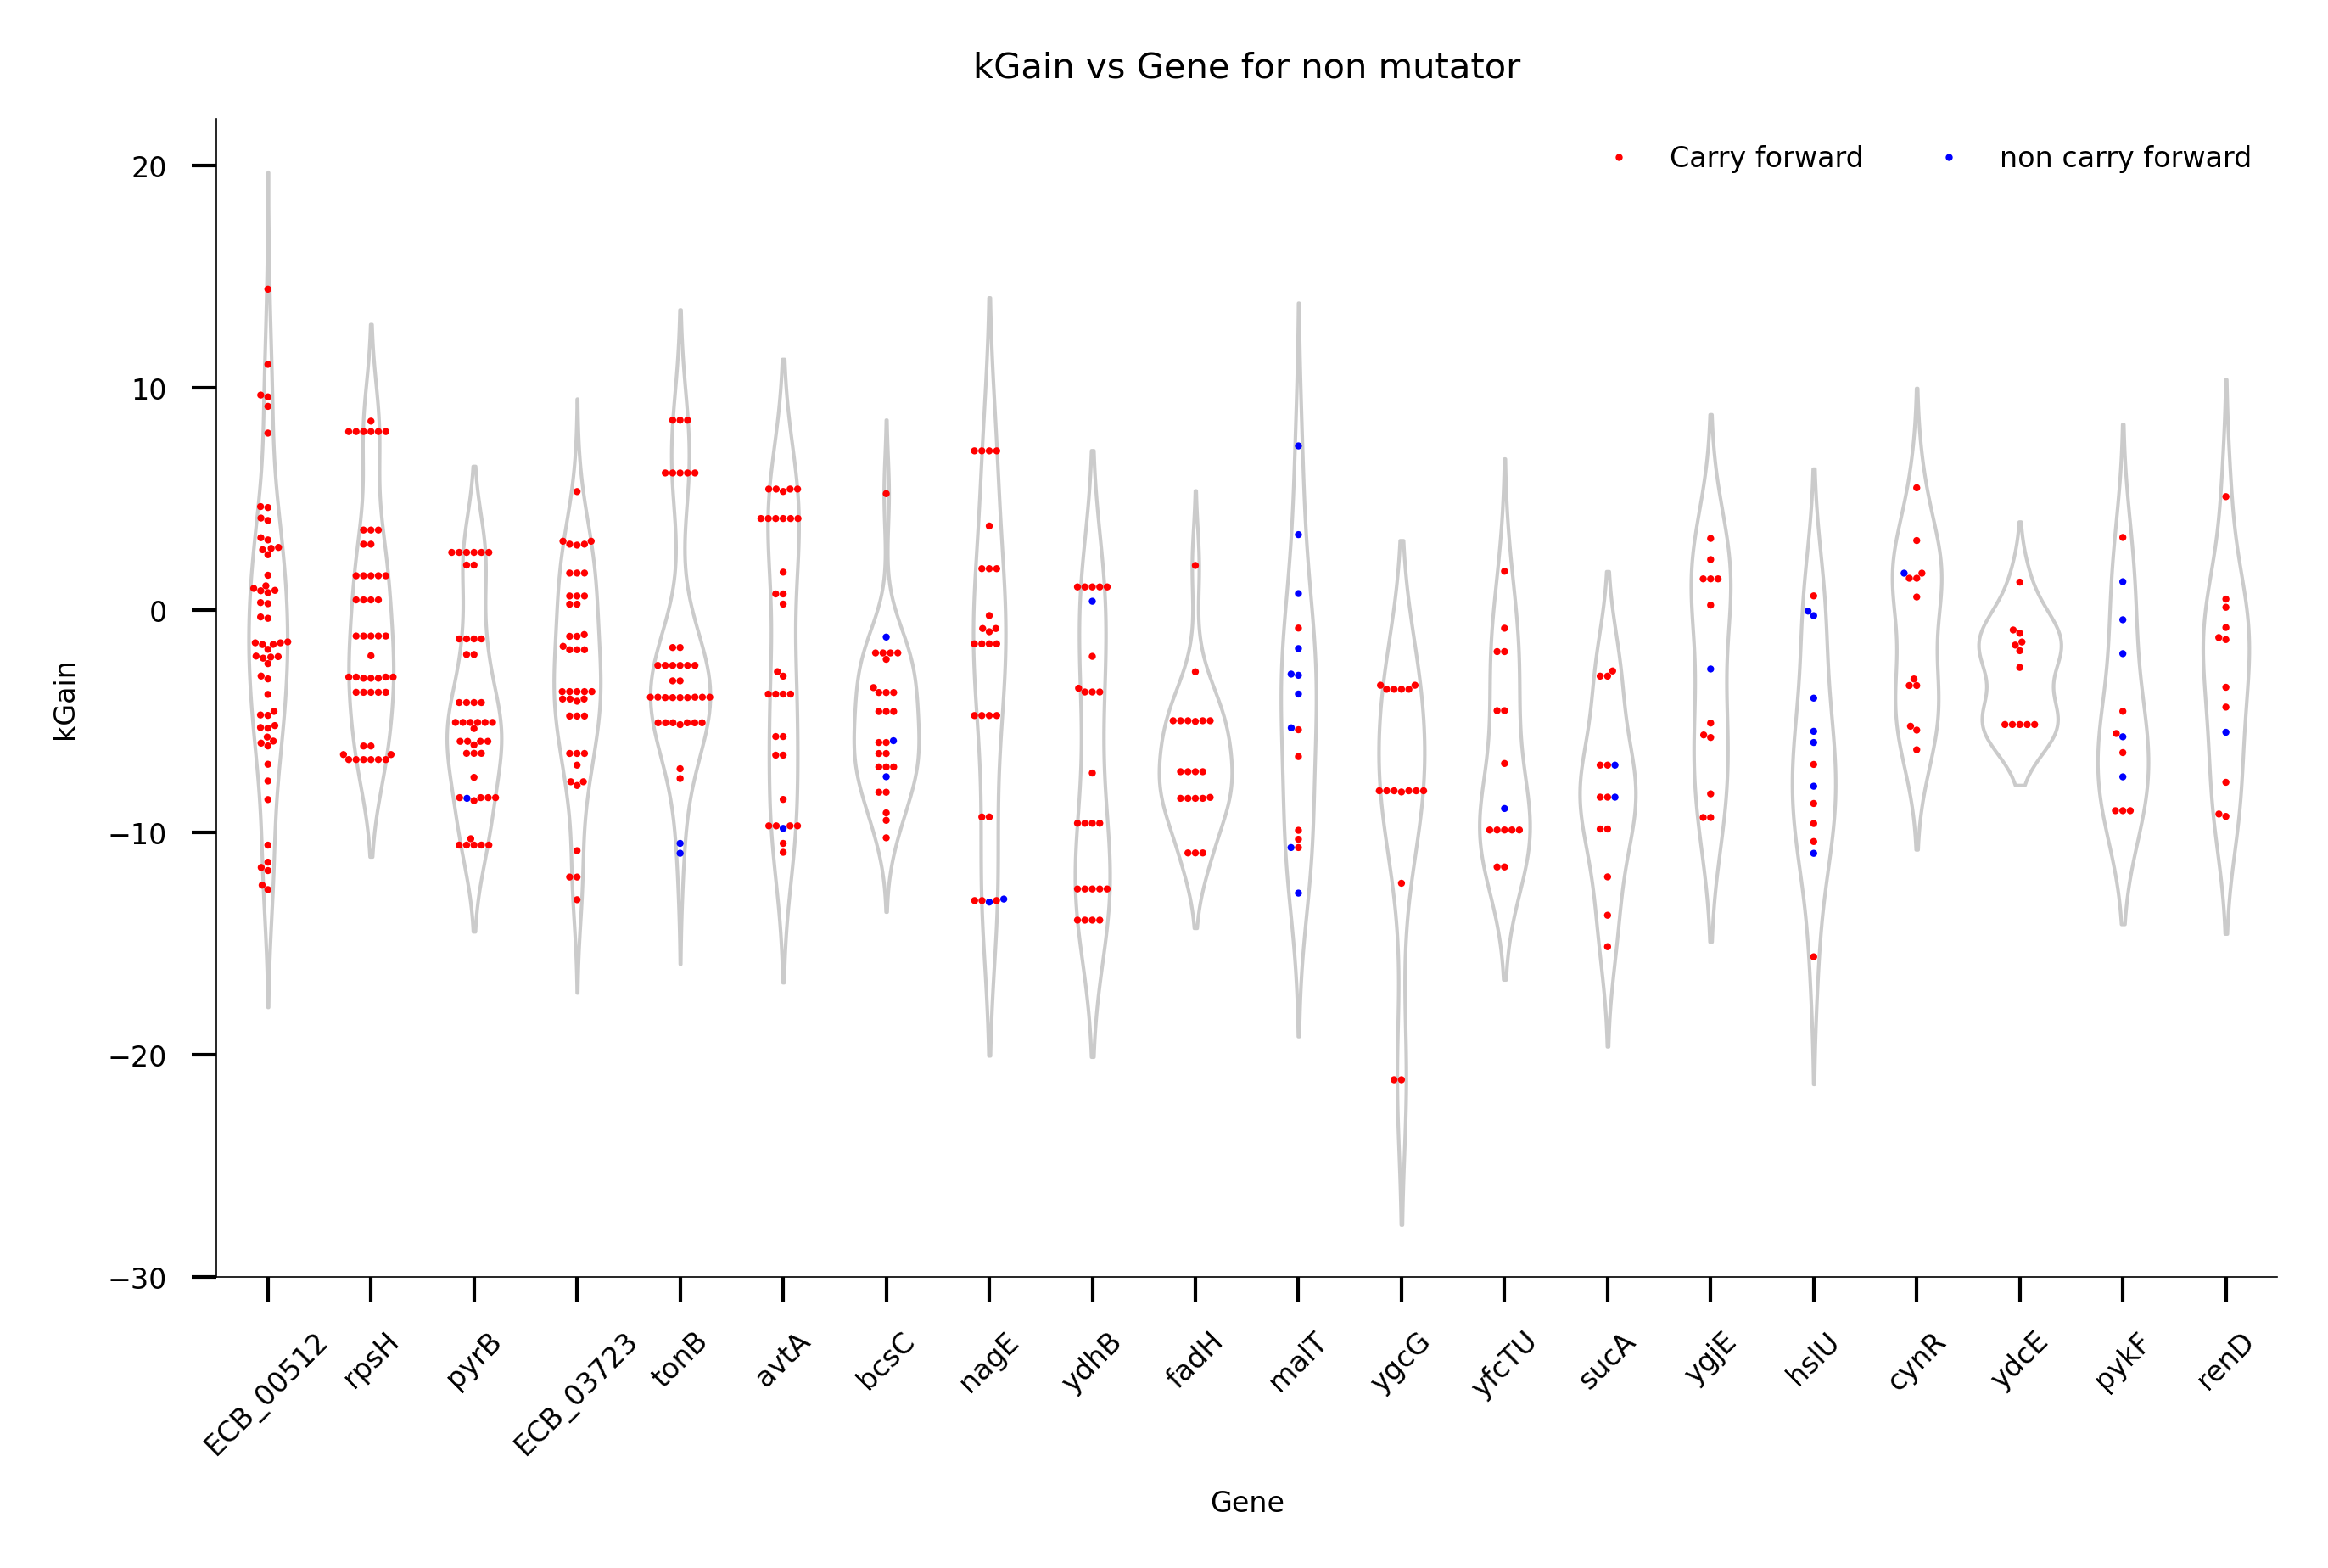

In [28]:
nonmutator_df=df_allele_generation_exclude_intergenic[df_allele_generation_exclude_intergenic.loc[:,"Mutator_Status"]=="nonmutator"]

frequent_genes_df_nm = nonmutator_df['Gene'].value_counts()
frequent_genes_df_nm = pd.DataFrame({'Gene': frequent_genes_df_nm.index, 'Freq_nm': frequent_genes_df_nm.values})
topnm = frequent_genes_df_nm.sort_values(by='Freq_nm', ascending=False).head(20)

merged_df_nm = pd.merge(topnm, nonmutator_df, on='Gene', how='left')

fig, ax = plt.subplots(1, 1, figsize = (5, 3), dpi = 600)
ax = sns.swarmplot(x='Gene', y='accumulated_gain', data=merged_df_nm, hue='mutation type', size=1, ax=ax, palette=mutation_colors)
ax = sns.violinplot(x='Gene', y='accumulated_gain', data=merged_df_nm, inner=None, color="1", alpha=0.5, width=0.8, ax=ax, linewidth=0.5)
ax.legend(ncol = 2, fontsize=4, frameon=False)
ax.set_ylabel("kGain")
plt.tight_layout()
ax.set_title("kGain vs Gene for non mutator", fontsize=5)
ax = utility.custom_figure_axis(ax, fontsize = 4, rotation = 45)

# plt.savefig("kGain vs Gene for non mutator.pdf", dpi = 600)